In [1]:
# With this cell any imported module is reloaded before each cell execution
%load_ext autoreload
%autoreload 2
from modules.data.load.loaders import GraphLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    describe_data,
    load_dataset_config,
    load_model_config,
    load_transform_config,
)

In [2]:
dataset_name = "manual_dataset"
dataset_config = load_dataset_config(dataset_name)
loader = GraphLoader(dataset_config)


Dataset configuration for manual_dataset:

{'data_domain': 'graph',
 'data_type': 'toy_dataset',
 'data_name': 'manual',
 'data_dir': 'datasets/graph/toy_dataset',
 'num_features': 1,
 'num_classes': 2,
 'task': 'classification',
 'loss_type': 'cross_entropy',
 'monitor_metric': 'accuracy',
 'task_level': 'node'}



Dataset only contains 1 sample:


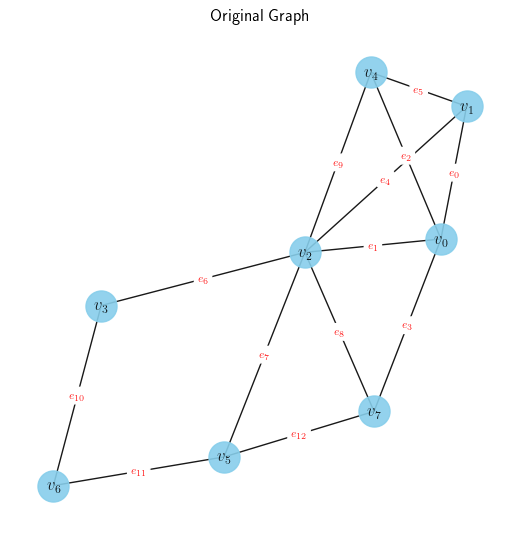

 - Graph with 8 vertices and 13 edges.
 - Features dimensions: [1, 0]
 - There are 0 isolated nodes.



In [3]:
dataset = loader.load()
describe_data(dataset)

In [4]:
# Define transformation type and id
transform_type = "liftings"
# If the transform is a topological lifting, it should include both the type of the lifting and the identifier
transform_id = "graph2simplicial/line_lifting"

# Read yaml file
transform_config = {
    "lifting": load_transform_config(transform_type, transform_id)
    # other transforms (e.g. data manipulations, feature liftings) can be added here
}


Transform configuration for graph2simplicial/line_lifting:

{'transform_type': 'lifting',
 'transform_name': 'SimplicialLineLifting',
 'feature_lifting': 'ProjectionSum'}


Processing...
Done!


{(0, 2): tensor([5.5000]), (2, 5): tensor([255.]), (1, 2): tensor([7.5000]), (1, 4): tensor([52.5000]), (2, 3): tensor([30.]), (2, 4): tensor([55.]), (3, 6): tensor([525.]), (5, 6): tensor([750.]), (5, 7): tensor([2750.]), (0, 7): tensor([2500.5000]), (0, 1): tensor([3.]), (0, 4): tensor([50.5000]), (2, 7): tensor([2505.])}

Dataset only contains 1 sample:


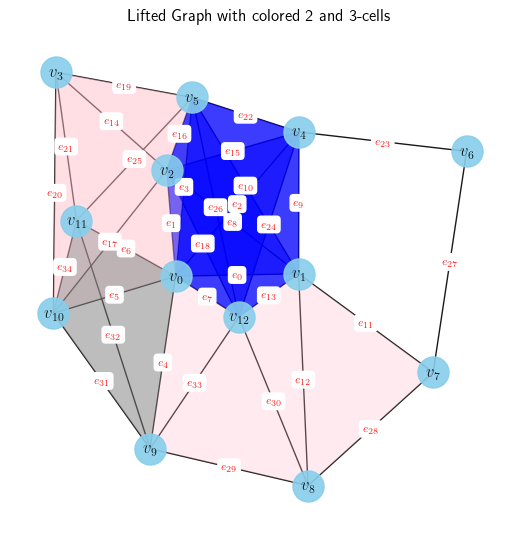

 - The complex has 13 0-cells.
 - The 0-cells have features dimension 1
 - The complex has 35 1-cells.
 - The 1-cells have features dimension 1
 - The complex has 34 2-cells.
 - The 2-cells have features dimension 1
 - The complex has 16 3-cells.
 - The 3-cells have features dimension 1
 - The complex has 6 4-cells.
 - The 4-cells have features dimension 1
 - The complex has 1 5-cells.
 - The 5-cells have features dimension 1



In [29]:
lifted_dataset = PreProcessor(dataset, transform_config, loader.data_dir)
describe_data(lifted_dataset)